# Classification Metrics
Classification metrics are like report cards for machine learning models that help you understand how well they perform at tasks like distinguishing between spam and non-spam emails, identifying diseases from medical test results, or recognizing cats and dogs in images. These metrics provide valuable insights into the model's accuracy, precision, recall, and more. Let's clarify and explain classification metrics in a beginner-friendly way, including their advantages, disadvantages, and common applications.

## Confusion Matrix


A confusion matrix is a table that is used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model. It's like a summary report card that tells you how well your machine learning model is performing in a binary classification task, such as determining if an email is spam or not spam. It helps you understand the model's correctness, errors, and overall performance.

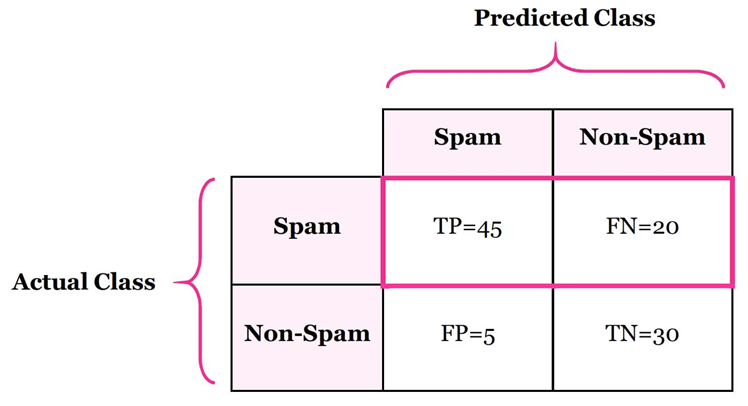

### Objective: 
Imagine you're grading a test with two possible answers: "correct" or "incorrect." A confusion matrix helps you keep track of how many answers were graded correctly and how many were graded incorrectly.

### Explanation:

1. Binary Classification: A confusion matrix is used when you have a machine learning model that needs to make binary decisions, like identifying whether an image contains a cat or not, or whether a patient has a disease or not.

2. True Positives (TP): These are cases where your model correctly predicted the positive class. For instance, correctly identifying a spam email as spam.

3. True Negatives (TN): These are cases where your model correctly predicted the negative class. For example, correctly identifying a non-spam email as not spam.

4. False Positives (FP): These are cases where your model wrongly predicted the positive class when it should have been negative. For instance, classifying a non-spam email as spam.

5. False Negatives (FN): These are cases where your model wrongly predicted the negative class when it should have been positive. For example, missing a spam email and classifying it as not spam.

## Advantages:

1. Comprehensive Evaluation: The confusion matrix provides a detailed breakdown of your model's performance, helping you see where it's making mistakes.
2. Easy Interpretation: It's easy to understand and interpret. You can quickly see how many correct and incorrect predictions your model is making.
3. Foundation for Metrics: Many classification metrics like accuracy, precision, and recall are calculated based on values from the confusion matrix.

## Disadvantages:

1. Binary Limitation: It's primarily designed for binary classification tasks and may not be as informative for multi-class problems.
2. Doesn't Show Trade-offs: While it shows the model's performance, it doesn't illustrate the trade-offs between metrics like precision and recall.

## Common Applications:

1. Medical Diagnosis: Assessing the accuracy of a model that predicts whether a patient has a disease based on test results.
2. Spam Detection: Evaluating the performance of an email filter that distinguishes spam emails from legitimate ones.
3. Image Classification: Measuring how well a model identifies objects or animals in images.
4. Credit Scoring: Assessing the model's ability to predict whether a loan applicant is likely to default on a loan.


In summary, a confusion matrix is a valuable tool for understanding the performance of your machine learning model in binary classification tasks. It helps you see where your model is getting things right and where it's making mistakes, guiding you in making improvements and fine-tuning your model for better results.

<hr>
<hr>

# Accuracy

is a metric that is used to evaluate the performance of a classification model. It is defined as the percentage of correct predictions made by the model.

To calculate accuracy, we divide the number of correct predictions by the total number of predictions:

### Accuracy = TP + TN / TP + TN + FP + FN

## Objective: 
Imagine you're taking a multiple-choice quiz, and accuracy measures how many of your answers are correct out of all the questions you've attempted.

## Explanation:

1. inary Classification: Accuracy is a metric used when your machine learning model needs to make binary decisions, like determining whether an image contains a cat or not, or if a patient has a disease or not.

2. Calculation: To calculate accuracy, you divide the number of correct predictions (both True Positives and True Negatives) by the total number of predictions (the sum of True Positives, True Negatives, False Positives, and False Negatives).

3. Percentage: The result is expressed as a percentage, indicating how often your model gets it right. For example, if your model's accuracy is 90%, it means it makes correct predictions 90% of the time.

## Advantages:

1. Simplicity: Accuracy is straightforward and easy to understand. It provides a quick way to assess how well your model is doing.
2. Intuitive: People are generally familiar with the concept of accuracy since it's similar to scoring a test.

## Disadvantages:

1. Misleading with Imbalanced Data: Accuracy can be misleading when you have imbalanced datasets where one class is significantly more common than the other. For instance, if 95% of your emails are not spam, a model that simply predicts "not spam" for every email can achieve 95% accuracy, even though it's not useful.
2. Ignores Type of Errors: Accuracy treats all errors equally. It doesn't distinguish between false positives and false negatives. In some cases, false positives may be more costly or critical than false negatives.



In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [7]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


DecisionTreeClassifier()

In [8]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.9016393442622951
Accuracy of Decision Trees 0.8360655737704918


In [10]:
confusion_matrix(y_test,y_pred1)

array([[26,  6],
       [ 0, 29]])

In [11]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,26,6
1,0,29


In [12]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,24,8
1,2,27


In [13]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2

In [14]:
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
257,0,0,0
65,1,1,1
164,1,1,1
29,1,1,1
296,0,1,0
184,0,0,0
161,1,1,1
292,0,0,0
53,1,1,1
147,1,1,1


In [15]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [16]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  26   6
1   0  29
--------------------------------------------------
Precision -  0.8285714285714286
Recall -  1.0
F1 score -  0.90625


In [17]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred2))
print("Recall - ",recall_score(y_test,y_pred2))
print("F1 score - ",f1_score(y_test,y_pred2))

For DT Model
--------------------------------------------------
    0   1
0  24   8
1   2  27
--------------------------------------------------
Precision -  0.7714285714285715
Recall -  0.9310344827586207
F1 score -  0.8437500000000001


In [18]:
precision_score(y_test,y_pred1,average=None)

array([1.        , 0.82857143])

In [19]:
precision_score(y_test,y_pred2,average=None)

array([0.92307692, 0.77142857])

In [21]:
recall_score(y_test,y_pred2,average=None)

array([0.75      , 0.93103448])